# Bootstrap Distributions

# 1. Introduction to bootstrapping

<b>1.1 Principles of bootstrapping</b>

Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

<b>1.2 With or without replacement?</b>

So far in the course, you've seen sampling with and without replacement. It's important to know when to use each method.

The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

<b>1.3 Generating a bootstrap distribution</b>

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
spotify_pop = pd.read_feather('C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\\Datasets\\spotify_2000_2020.feather')
print(spotify_pop.head())


spotify_sample = spotify_pop[['artists', 'name', 'danceability']]
spotify_sample = spotify_sample.reset_index()
print('\n')
print(spotify_sample.head())

   acousticness          artists  danceability  duration_ms  duration_minutes  \
0       0.97200  ['David Bauer']         0.567     313293.0          5.221550   
1       0.32100   ['Etta James']         0.821     360240.0          6.004000   
2       0.00659    ['Quasimoto']         0.706     202507.0          3.375117   
3       0.00390  ['Millencolin']         0.368     173360.0          2.889333   
4       0.12200   ['Steve Chou']         0.501     344200.0          5.736667   

   energy  explicit                      id  instrumentalness   key  liveness  \
0   0.227       0.0  0w0D8H1ubRerCXHWYJkinO          0.601000  10.0     0.110   
1   0.418       0.0  4JVeqfE2tpi7Pv63LJZtPh          0.000372   9.0     0.222   
2   0.602       1.0  5pxtdhLAi0RTh1gNqhGMNA          0.000138  11.0     0.400   
3   0.977       0.0  3jRsoe4Vkxa4BMYqGHX8L0          0.000000  11.0     0.350   
4   0.511       0.0  4mronxcllhfyhBRqyZi8kU          0.000000   7.0     0.279   

   loudness  mode         

In [183]:
'''Generate a single bootstrap resample from spotify_sample'''

# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample.head())

       index                       artists                               name  \
13101  13101               ['Fiona Apple']  Tymps (The Sick in the Head Song)   
31043  31043                      ['Ruel']                                Say   
609      609                      ['Reik']                           Invierno   
31101  31101  ['PnB Rock', 'XXXTENTACION']                       MIDDLE CHILD   
31344  31344                    ['*NSYNC']                No Strings Attached   

       danceability  
13101         0.850  
31043         0.617  
609           0.665  
31101         0.750  
31344         0.665  


In [184]:
'''Calculate the mean of the danceability column of spotify_1_resample using numpy'''

# Calculate mean danceability of resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5909081380833493


In [185]:
'''Replicate the expression provided 1000 times'''

# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000[:10])

[0.5907991189744575, 0.590698329172268, 0.5898962862492798, 0.5907965743230267, 0.5921348089110813, 0.5912475273670059, 0.5923006433647013, 0.5926942745342808, 0.5924480290954485, 0.5900086590167083]


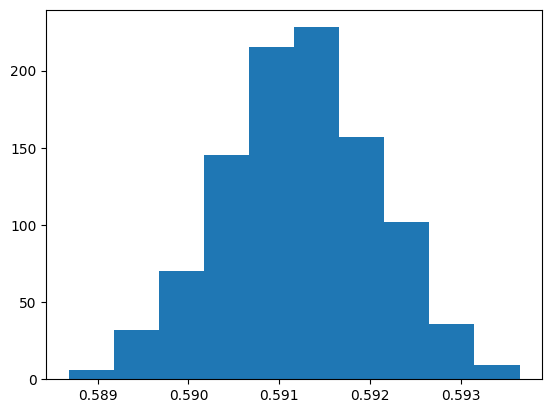

In [186]:
'''Create a bootstrap distribution by drawing a histogram of mean_danceability_1000'''

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

# 2. Comparing sampling and bootstrap distributions 

<b>2.1 Bootstrap statistics and population statistics</b>

Bootstrap distribution statistics can be used to estimate population parameters. But can you always rely on them to give an accurate estimate of an unknown population parameter?

Should the mean and the standard deviation of the bootstrap distribution both be used to estimate the corresponding values of the population?

- No, the standard deviation of the bootstrap distribution divided by the square root of the sample size will tend to be near the sample standard deviation, which may not necessarily be very close to the population standard deviation.

- Yes, both estimates should match up closely with the population values in all scenarios.

- No, the mean of the bootstrap distribution will always be near the sample mean, which may not necessarily be very close to the population mean.    (True)

- Yes, the variability of the sample, the population, the bootstrap distribution, and the sampling distribution will all be similar regardless of the sample size selected.



If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

<b>2.2 Sampling distribution vs. bootstrap distribution</b>

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and numpy are loaded with their usual aliases.

In [187]:
'''
- Generate a sampling distribution of 2000 replicates.
- Sample 500 rows of the population without replacement and calculate the mean popularity
'''

mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_pop.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp[:10])

[55.328, 55.396, 55.228, 54.732, 54.702, 54.898, 54.704, 54.634, 55.788, 54.824]


In [188]:
'''
- Generate a bootstrap distribution of 2000 replicates.
- Sample 500 rows of the sample with replacement and calculate the mean popularity
'''
spotify_sample = spotify_pop.sample(n=500)

mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(frac=1, replace=True)['popularity'])
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot[:10])


[55.756, 55.208, 54.36, 54.632, 55.05, 54.408, 55.098, 55.552, 55.494, 55.264]


<b>2.3 Compare sampling and bootstrap means</b>

To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

In [189]:
spotify_sample = spotify_pop.sample(n=5000)

sampling_distribution = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    sampling_distribution.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_pop.sample(n=5000)['popularity'].mean()
    )


bootstrap_distribution = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    bootstrap_distribution.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean(spotify_sample.sample(frac=1, replace=True)['popularity'])
    )

In [190]:
# Calculate the population mean popularity
pop_mean = spotify_pop['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.6456, 54.8354254, 54.6477399]


The sampling distribution and bootstrap distribution are closely related, and so is the code to generate them.

<b>Question</b>

Based on the four means you just calculated (pop_mean, samp_mean, samp_distn_mean, and boot_distn_mean), which statement is true?

Possible Answers:

- The sampling distribution mean is closest to the original sample mean; the bootstrap distribution mean is the best estimate of the true population mean.

- The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.  (True)

- The sampling distribution mean and the bootstrap distribution mean are equally good estimates of the original sample mean.

- The sampling distribution mean and the bootstrap distribution mean are equally good estimates of the true population mean.


The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

<b>2.3 Compare sampling and bootstrap standard deviations</b>

In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

Recall that the sample size is 5000.

spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases.

In [191]:
# Calculate the population mean popularity
pop_std = spotify_pop['popularity'].std(ddof=0)

# Calculate the original sample mean popularity
samp_std = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_std = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_std = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the means
print([pop_std, samp_std, samp_distn_std, boot_distn_std])

[10.880065274257536, 10.906172085471217, 10.10674789191238, 11.107033489479457]


<b>Question</b>

Based on the four results you just calculated (pop_sd, samp_sd, samp_distn_sd, and boot_distn_sd), which statement is true?

Possible Answers

- The calculation from the bootstrap distribution is the best estimate of the population standard deviation. (True)

- The calculation from the sampling distribution is the best estimate of the population standard deviation.

- The calculation from the sample is the best estimate of the population standard deviation.

- The calculations from both the sampling distribution and from the bootstrap distribution are equally close to the population standard deviation.


This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

# 4. Confidence intervals

<b>4.1 Confidence interval interpretation</b>

When reporting results, it is common to provide a confidence interval alongside an estimate.

What information does that confidence interval provide?

- A range of all possible values that a variable from a sample may take on.

- All numbers between 0 and 1.

- A range of plausible values for a variable measured in our population (such as popularity in spotify_population).

- A range of plausible values for an unknown quantity. (True)

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.

<b>4.2 Calculating confidence intervals</b>

You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

In [192]:
'''
Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 
0.025 quantile as lower_quant and the 0.975 quantile as upper_quant.'''

# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(54.344985, 54.970475)


In [193]:
'''
- Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
- Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation 
  of bootstrap_distribution.
- Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate 
  and standard deviation standard_error.
- Calculate upper_se as the 0.975 quantile of that same inv. CDF.
'''
from scipy.stats import norm
# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(54.339874296195006, 54.95560550380499)


The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.